In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [255]:
train = pd.read_csv('cs-training.csv')
test = pd.read_csv('cs-test.csv')
sample = pd.read_csv('sampleEntry.csv')


In [214]:
train

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [215]:
# Naming unamed features
train.rename(columns = {'Unnamed: 0':'ID'} , inplace = True)
train.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [216]:
# Converting every Feature in small letter

train.columns = train.columns.str.lower()

In [217]:
# Replacing - 
AllColumns = [ column for column in train.columns ]
for c in AllColumns:
    if '-' in c:
        index = c.index('-')
        splitted = c[0:index] + c[index+1:len(c)]
        train.rename({c:splitted} , inplace = True)
        print(splitted)

numberoftime3059dayspastduenotworse
numberoftime6089dayspastduenotworse


In [218]:
train.drop('id' , inplace = True , axis = 1)
train.describe()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [219]:
# Checking the distribution of our target 
percentile = train['seriousdlqin2yrs'].value_counts()/len(train)*100

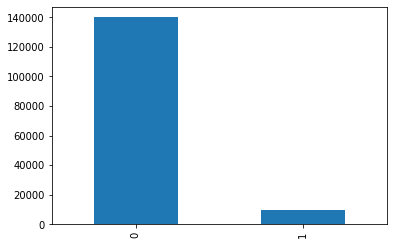

In [9]:
train.seriousdlqin2yrs.value_counts().plot(kind = 'bar')

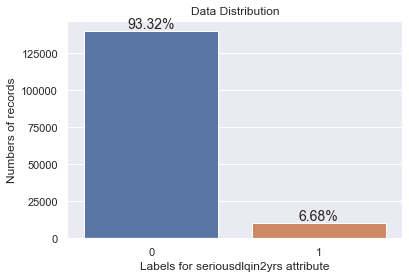

In [10]:
# Graphical representation of the target label percentage.
sns.set()
sns.countplot(train.seriousdlqin2yrs).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/len(train))),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for seriousdlqin2yrs attribute")
ax.set_ylabel("Numbers of records")
plt.show()


### Missing values

In [11]:
train.isna().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime30-59dayspastduenotworse        0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime60-89dayspastduenotworse        0
numberofdependents                       3924
dtype: int64

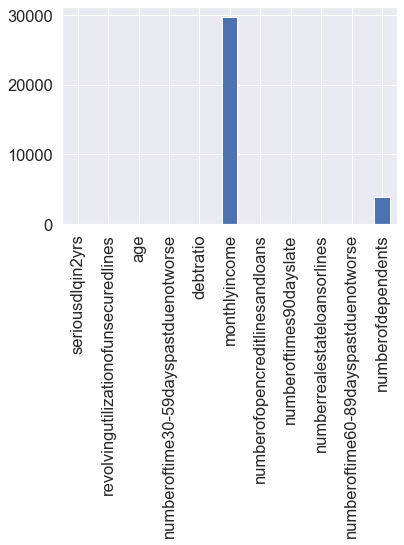

In [12]:
train.isna().sum().plot(kind ='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

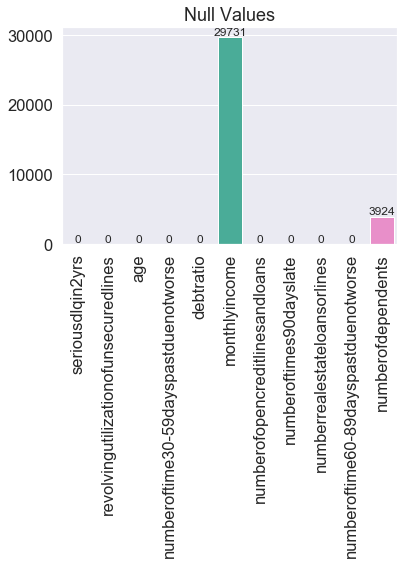

In [13]:
# Or
sns.barplot(train.columns , train.isnull().sum()).set_title('Null Values')
ax = plt.gca()
for a in ax.patches:
    height = a.get_height()
    ax.text(a.get_x() + a.get_width()/2. , height+ 1 , int(height),fontsize = 12 , ha='center', va='bottom')
plt.xticks(rotation = 90)


In [14]:
train.fillna((train.mean()) , inplace = True)

In [15]:
train.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime30-59dayspastduenotworse    0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime60-89dayspastduenotworse    0
numberofdependents                      0
dtype: int64

### Correlation

In [16]:
train.corr()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
seriousdlqin2yrs,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.018002,-0.029669,0.117175,-0.007038,0.102261,0.045621
revolvingutilizationofunsecuredlines,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.006565,-0.011281,-0.001061,0.006235,-0.001048,0.001539
age,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.032984,0.147705,-0.061005,0.033150,-0.057159,-0.208102
numberoftime30-59dayspastduenotworse,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.007636,-0.055312,0.983603,-0.030565,0.987005,-0.002525
debtratio,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.005355,0.049565,-0.008320,0.120046,-0.007533,-0.038287
monthlyincome,-0.018002,0.006565,0.032984,-0.007636,-0.005355,1.000000,0.082319,-0.009484,0.113823,-0.008259,0.058542
numberofopencreditlinesandloans,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.082319,1.000000,-0.079984,0.433959,-0.071077,0.064507
numberoftimes90dayslate,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.009484,-0.079984,1.000000,-0.045205,0.992796,-0.009579
numberrealestateloansorlines,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.113823,0.433959,-0.045205,1.000000,-0.039722,0.123370
numberoftime60-89dayspastduenotworse,0.102261,-0.001048,-0.057159,0.987005,-0.007533,-0.008259,-0.071077,0.992796,-0.039722,1.000000,-0.010277


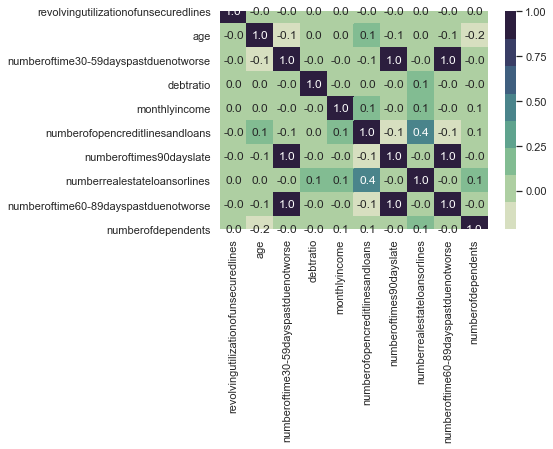

In [94]:
sns.set()
sns.heatmap(train[train.columns[1:]].corr(),annot=True,fmt=".1f",
            cmap=(sns.cubehelix_palette(8, start=.5, rot=-.75)) )
plt.show()

### Outliers Detection

In [18]:
# Percentile Outlier Detection
#percentile_based_outlier(data=training_data.revolvingutilizationofunsecuredlines)

# Another percentile based outlier detection method which is based on inter quertile(IQR) range
# import numpy as np
# def outliers_iqr(ys):
#     quartile_1, quartile_3 = np.percentile(ys, [25, 75])
#     iqr = quartile_3 - quartile_1
#     lower_bound = quartile_1 - (iqr * 1.5)
#     upper_bound = quartile_3 + (iqr * 1.5)
#     return np.where((ys > upper_bound) | (ys < lower_bound))
def percentile_based_outlier( data , threshold = 95):
    threshold1 = (100 - 95)/2.0
    minval , maxval = np.percentile(data , [threshold1 , threshold] )
    return ((data < minval) | (data > maxval))
    

In [19]:
def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold
#mad_based_outlier(points=training_data.age)

In [20]:
# Standard Deviation method
def std_div( data , threshold = 3 ):
    isOutlier = []
    sd = data.std()
    for dataa in data:
        if dataa/sd > 3 :
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

In [21]:
# Now if max any 2 of these technique result in True(Outlier) result will be True
def outlierVote( data ):
    x = percentile_based_outlier( data )
    y = mad_based_outlier( data )
    z = std_div(data)
    temp = zip(data.index, x, y, z)
    final = []
    for i in range(temp.shape[0]):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

In [24]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

### Feature Selection

In [28]:
# Selecting best feature from our dataset using random forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 1000 , n_jobs =-1 , random_state = 0)
forest.fit(train.drop('seriousdlqin2yrs' , axis =1 ) , train.seriousdlqin2yrs)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [31]:
X = train.drop('seriousdlqin2yrs' , axis =1 )
y = train.seriousdlqin2yrs

In [82]:
important = forest.feature_importances_
for i in range((X.shape[1]) ):
    print('{0}) {1} -> {2}'.format(i + 1 , X.columns[np.argsort(important)[::-1][i] ] , np.sort(important)[::-1][i] ))

1) debtratio -> 0.18417144691474965
2) revolvingutilizationofunsecuredlines -> 0.17658162200121144
3) monthlyincome -> 0.14909100627444902
4) age -> 0.13072513411056366
5) numberofopencreditlinesandloans -> 0.09073447892239093
6) numberoftimes90dayslate -> 0.09071480966080876
7) numberoftime30-59dayspastduenotworse -> 0.05037728238183975
8) numberoftime60-89dayspastduenotworse -> 0.04855982318817112
9) numberofdependents -> 0.04486554262731284
10) numberrealestateloansorlines -> 0.03417885391850289


In [83]:
indices = np.argsort(important)[::-1]

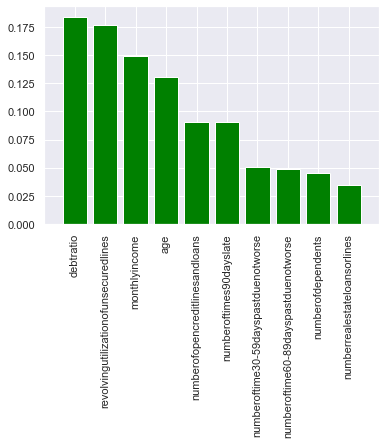

In [101]:
plt.bar(X.columns[np.argsort(important)[::-1]] , important[indices], color="green", align="center" )
plt.xticks(rotation = 90 )
plt.xlim([-1, X.shape[1]])
plt.show()

In [95]:
X.columns[np.argsort(important)[::-1]] 

Index(['debtratio', 'revolvingutilizationofunsecuredlines', 'monthlyincome',
       'age', 'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberoftime30-59dayspastduenotworse',
       'numberoftime60-89dayspastduenotworse', 'numberofdependents',
       'numberrealestateloansorlines'],
      dtype='object')

## Train and build baseline model

In [102]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , random_state = 0 , test_size = 0.23)

In [124]:
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [111]:
knn = KNeighborsClassifier( n_neighbors = 5 , p = 2 , metric = 'minkowski' , weights = 'uniform')
lr = LogisticRegression(penalty = 'l1' , multi_class = 'ovr' , verbose = 2 )
ab = AdaBoostClassifier( n_estimators = 200 , learning_rate = 1.0)
gb = GradientBoostingClassifier( n_estimators = 200 , learning_rate=0.1)
rf = RandomForestClassifier( n_estimators = 10 , max_depth = None , min_samples_split = 2 , min_samples_leaf = 1 ,random_state = 0 )

## Training our training set

In [116]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [117]:
lr.fit(x_train,y_train)

C:\Users\prashant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=2,
                   warm_start=False)

In [118]:
ab.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [119]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [120]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Testing our models
## Using Mean Accuracy , and ROC - AUC Curve

In [160]:
knn.score(x_test , y_test)

0.9299710144927537

In [162]:
from sklearn import metrics
metrics.accuracy_score(y_test , knn.predict(x_test))

0.9299710144927537

In [127]:
predicted = knn.predict_proba( x_test.values)[:,1]
metrics.roc_auc_score( y_test , predicted)

0.5834829014904925

In [128]:
lr.score(x_test , y_test)

0.9333623188405797

In [132]:
predicted = lr.predict_proba( x_test.values)[:,1]
metrics.roc_auc_score( y_test , predicted)

0.7544342384215861

In [129]:
ab.score(x_test , y_test)

0.9342898550724638

In [148]:
predicted = ab.predict_proba( x_test.values)[:,1]
fpr , tpr ,_=metrics.roc_curve( y_test , predicted)

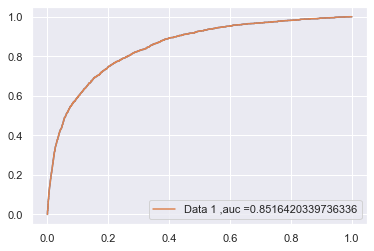

In [155]:
auc = metrics.roc_auc_score(y_test , predicted)
plt.plot(fpr,tpr)
plt.plot(fpr,tpr , label = "Data 1 ,auc =" + str(auc))
plt.legend(loc=4)
plt.show()

In [130]:
gb.score(x_test , y_test)

0.935536231884058

In [157]:
predicted = gb.predict_proba( x_test.values)[:,1]
fpr , tpr ,_=metrics.roc_curve( y_test , predicted)

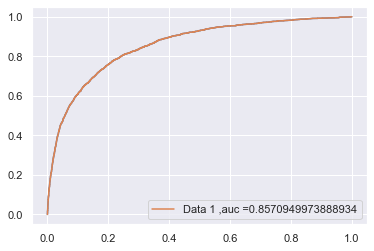

In [158]:
auc = metrics.roc_auc_score(y_test , predicted)
plt.plot(fpr,tpr)
plt.plot(fpr,tpr , label = "Data 1 ,auc =" + str(auc))
plt.legend(loc=4)
plt.show()

In [131]:
rf.score(x_test , y_test)

0.9324057971014493

In [142]:
predicted = rf.predict_proba( x_test.values)[:,1]
fpr , tpr , thresholds= metrics.roc_curve( y_test , predicted)

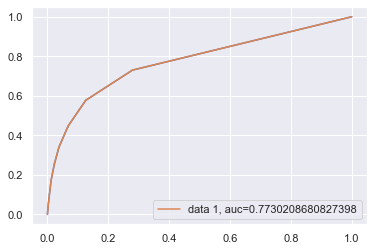

In [145]:
plt.plot(fpr,tpr)
auc = metrics.roc_auc_score(y_test, predicted)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Cross Validation

In [189]:
from sklearn.model_selection import cross_val_score
def cvDictGen(functions, scr, X_train=x_train, y_train=y_train, cv=5, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

def cvDictNormalize(CVGen):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[cvDict.keys()[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[cvDict.keys()[0]][1]))]
    return cvDictNormalized

In [190]:
from sklearn.metrics import roc_auc_score
l = cvDictGen(functions= [knn , lr, ab ,gb ,rf ] ,scr = 'roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\prashant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

C:\Users\prashant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

C:\Users\prashant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

C:\Users\prashant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

C:\Users\prashant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   21.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.7s finished


In [193]:
l

{'KNeighborsClassifier': [0.5833356665905042, 0.004870760233213752],
 'LogisticRegression': [0.7645052359290154, 0.006831516823692886],
 'AdaBoostClassifier': [0.8601216908567748, 0.005264261418040281],
 'GradientBoostingClassifier': [0.8663551627041093, 0.004813128036700053],
 'RandomForestClassifier': [0.7822213909176622, 0.004154518973106705]}

### Hyper parameter optimization using Randomized search


In [195]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [197]:
adaHyperParams = {'n_estimators': [10,50,100]}
gridSearchAda = RandomizedSearchCV(estimator=ab, param_distributions=adaHyperParams, n_iter=5,
                                   scoring='roc_auc', cv=None, verbose=2).fit(x_train, y_train)

C:\Users\prashant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\prashant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=10, total=   1.1s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   1.1s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.1s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   5.2s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   5.1s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   5.1s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=  10.7s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=  10.7s
[CV] n_estimators=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   50.2s finished


In [198]:
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 100}, 0.8600490207383031)

In [199]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 120),
                 'max_depth': randint(1,6)}
gridSearchGB = RandomizedSearchCV(estimator=gb, param_distributions=gbHyperParams, n_iter=6,
                                   scoring='roc_auc', cv=None, verbose=2).fit(x_train, y_train)

C:\Users\prashant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] loss=exponential, max_depth=1, n_estimators=25 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... loss=exponential, max_depth=1, n_estimators=25, total=   1.2s
[CV] loss=exponential, max_depth=1, n_estimators=25 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ... loss=exponential, max_depth=1, n_estimators=25, total=   1.2s
[CV] loss=exponential, max_depth=1, n_estimators=25 ..................
[CV] ... loss=exponential, max_depth=1, n_estimators=25, total=   1.2s
[CV] loss=exponential, max_depth=4, n_estimators=111 .................
[CV] .. loss=exponential, max_depth=4, n_estimators=111, total=  18.7s
[CV] loss=exponential, max_depth=4, n_estimators=111 .................
[CV] .. loss=exponential, max_depth=4, n_estimators=111, total=  18.9s
[CV] loss=exponential, max_depth=4, n_estimators=111 .................
[CV] .. loss=exponential, max_depth=4, n_estimators=111, total=  18.5s
[CV] loss=deviance, max_depth=4, n_estimators=16 .....................
[CV] ...... loss=deviance, max_depth=4, n_estimators=16, total=   3.1s
[CV] loss=deviance, max_depth=4, n_estimators=16 .....................
[CV] ...... loss=deviance, max_depth=4, n_estimators=16, total=   3.1s
[CV] loss=deviance, max_depth=4, n_estimators=16 .....................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.9min finished


In [200]:
gridSearchGB.best_params_ , gridSearchGB.best_score_

({'loss': 'exponential', 'max_depth': 4, 'n_estimators': 111},
 0.8663310548926749)

### Train models with help of new hyper parameter

In [204]:
newGB = gridSearchGB.best_estimator_.fit(x_train , y_train )
newAB = gridSearchAda.best_estimator_.fit(x_train , y_train )


In [205]:
newCV = cvDictGen(functions= [newGB , newAB ] ,scr = 'roc_auc')
newCV

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.0min finished


{'GradientBoostingClassifier': [0.8666243999399112, 0.005110081437609445],
 'AdaBoostClassifier': [0.8606618620930787, 0.005346670502736166]}

In [206]:
newGB.score(x_test,y_test)

0.9358260869565217

In [208]:
predicted = newGB.predict_proba( x_test.values )[:,1]
metrics.roc_auc_score(y_test , predicted)


0.858240403176479

## Feature Scaling 

In [210]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = pd.DataFrame( scale.fit_transform(x_train ) )
x_test = pd.DataFrame( scale.fit_transform(x_test ) )

In [212]:
gridSearchGB.fit(x_train,y_train)

C:\Users\prashant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] loss=deviance, max_depth=3, n_estimators=18 .....................
[CV] ...... loss=deviance, max_depth=3, n_estimators=18, total=   2.1s
[CV] loss=deviance, max_depth=3, n_estimators=18 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ...... loss=deviance, max_depth=3, n_estimators=18, total=   2.0s
[CV] loss=deviance, max_depth=3, n_estimators=18 .....................
[CV] ...... loss=deviance, max_depth=3, n_estimators=18, total=   2.1s
[CV] loss=deviance, max_depth=2, n_estimators=55 .....................
[CV] ...... loss=deviance, max_depth=2, n_estimators=55, total=   4.3s
[CV] loss=deviance, max_depth=2, n_estimators=55 .....................
[CV] ...... loss=deviance, max_depth=2, n_estimators=55, total=   4.4s
[CV] loss=deviance, max_depth=2, n_estimators=55 .....................
[CV] ...... loss=deviance, max_depth=2, n_estimators=55, total=   4.3s
[CV] loss=deviance, max_depth=5, n_estimators=57 .....................
[CV] ...... loss=deviance, max_depth=5, n_estimators=57, total=  13.0s
[CV] loss=deviance, max_depth=5, n_estimators=57 .....................
[CV] ...... loss=deviance, max_depth=5, n_estimators=57, total=  13.1s
[CV] loss=deviance, max_depth=5, n_estimators=57 .....................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.9min finished


RandomizedSearchCV(cv=None, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                  

In [ ]:
gridSearchGB.score(x_test , y_test)

## Testing our real test dataset

In [239]:
test.rename(columns = {'Unnamed: 0':'ID'} , inplace = True)
test.columns = test.columns.str.lower()
AllColumns = [ column for column in test.columns ]
for c in AllColumns:
    if '-' in c:
        index = c.index('-')
        splitted = c[0:index] + c[index+1:len(c)]
        test.rename({c:splitted} , inplace = True)

test.drop('id' , inplace = True , axis = 1) 
test.fillna((test.mean()) , inplace = True)
test = pd.DataFrame( scale.fit_transform(test ) )

C:\Users\prashant\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\prashant\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [242]:
test.drop(0 , inplace = True ,axis =1 )
test

,1,2,3,4,5,6,7,8,9,10
0,-0.022556,-0.636376,-0.099983,-0.210891,-3.532890e-02,-0.865756,-0.0657,-0.912475,-0.060023,-0.685442
1,-0.024709,0.310870,-0.099983,-0.210677,6.992045e-02,1.272627,-0.0657,2.690325,-0.060023,1.097135
2,-0.026850,0.446191,-0.099983,-0.210578,-5.420098e-02,0.689431,-0.0657,-0.011775,-0.060023,1.097135
3,-0.025641,-0.974678,0.120356,-0.210432,-1.117960e-01,-0.282561,-0.0657,0.888925,-0.060023,-0.685442
4,-0.021972,-1.718943,-0.099983,-0.210987,-9.145576e-02,-0.865756,-0.0657,-0.912475,-0.060023,0.205846
...,...,...,...,...,...,...,...,...,...,...
101498,-0.025629,-1.921925,-0.099983,-0.210957,-1.668523e-01,-0.671358,-0.0657,-0.912475,-0.060023,-0.685442
101499,-0.022369,-1.109999,0.561033,-0.210427,2.324492e-02,-0.088162,-0.0657,0.888925,-0.060023,2.879712
101500,-0.026654,1.190456,-0.099983,0.301071,5.563715e-17,-1.060154,-0.0657,-0.912475,-0.060023,0.000000
101501,-0.025360,0.243210,-0.099983,1.974489,5.563715e-17,-0.088162,-0.0657,0.888925,0.162024,1.988423


In [246]:
test.columns = train.columns[2:]
test

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-0.022556,-0.636376,-0.099983,-0.210891,-3.532890e-02,-0.865756,-0.0657,-0.912475,-0.060023,-0.685442
1,-0.024709,0.310870,-0.099983,-0.210677,6.992045e-02,1.272627,-0.0657,2.690325,-0.060023,1.097135
2,-0.026850,0.446191,-0.099983,-0.210578,-5.420098e-02,0.689431,-0.0657,-0.011775,-0.060023,1.097135
3,-0.025641,-0.974678,0.120356,-0.210432,-1.117960e-01,-0.282561,-0.0657,0.888925,-0.060023,-0.685442
4,-0.021972,-1.718943,-0.099983,-0.210987,-9.145576e-02,-0.865756,-0.0657,-0.912475,-0.060023,0.205846
...,...,...,...,...,...,...,...,...,...,...
101498,-0.025629,-1.921925,-0.099983,-0.210957,-1.668523e-01,-0.671358,-0.0657,-0.912475,-0.060023,-0.685442
101499,-0.022369,-1.109999,0.561033,-0.210427,2.324492e-02,-0.088162,-0.0657,0.888925,-0.060023,2.879712
101500,-0.026654,1.190456,-0.099983,0.301071,5.563715e-17,-1.060154,-0.0657,-0.912475,-0.060023,0.000000
101501,-0.025360,0.243210,-0.099983,1.974489,5.563715e-17,-0.088162,-0.0657,0.888925,0.162024,1.988423


In [247]:
FinalPrediction = gridSearchGB.predict(test)

In [249]:
output = pd.DataFrame({'ID':test.index, 'probability':FinalPrediction})

In [256]:
output

,ID,probability
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
101498,101498,0
101499,101499,0
101500,101500,0
101501,101501,0


In [257]:
output.to_csv('Output.csv' , index = False)